In [2]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [280]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/sample/raw_copy.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(sentences=True), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
    ],
    new_file="../datasets/sample/statistics/data.csv",
    progress_bar=True
)

100%|██████████| 250/250 [00:02<00:00, 94.43it/s] 

finish time: 4.06477952003479


In [ ]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/statistics/data.csv")

In [6]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/sample/raw_copy.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(sentences=False), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
        (pp.Untokenizer(), 'content'),
        (pp.Tokenizer(sentences=True), 'content'),
    ],
    new_file="../datasets/sample/statistics/data_sentences.csv",
    progress_bar=True
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 250/250 [00:00<00:00, 3645.65it/s]

finish time: 3.503451347351074


In [7]:
importlib.reload(hc)
Stat_sentences = hc.Statistics("../datasets/sample/statistics/data_sentences.csv")

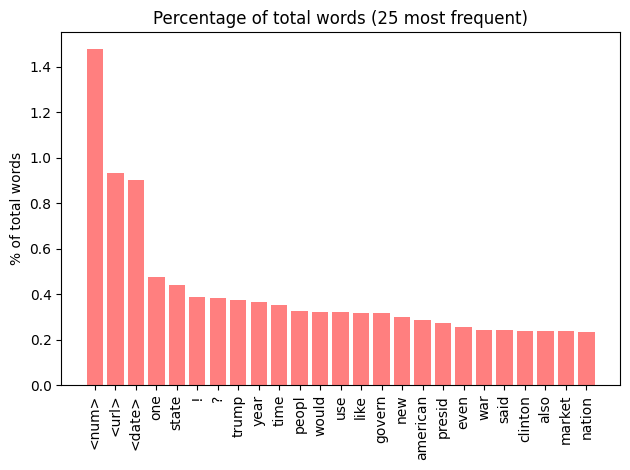

In [282]:
Stat.barplot_word_frequency(nwords=25, percentage=True)

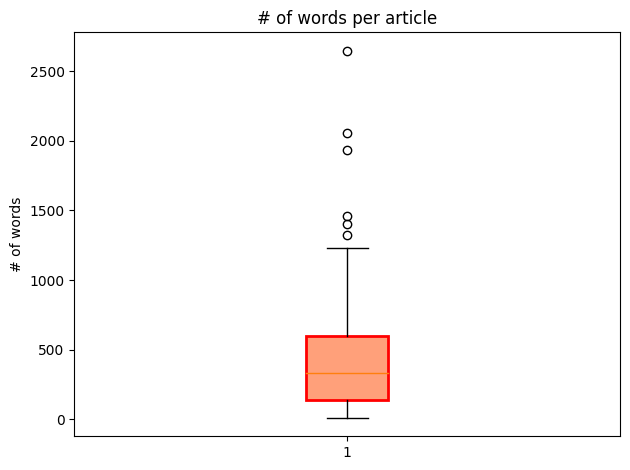

In [283]:
Stat.boxplot_word_frequency()

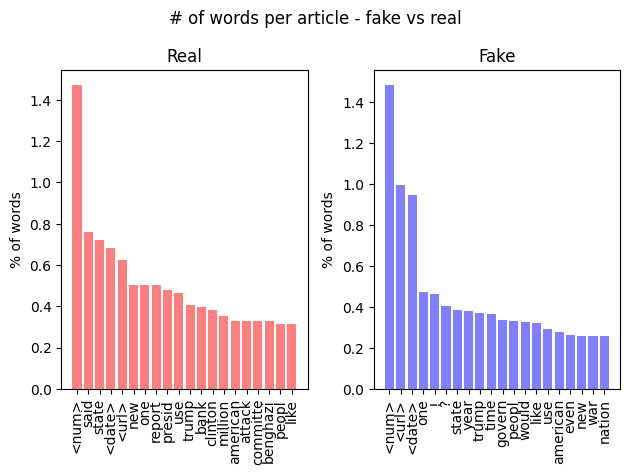

In [284]:
Stat.barplot_word_frequency_fake_vs_real(nwords=20, binary_label="binary_label", percentage=True)

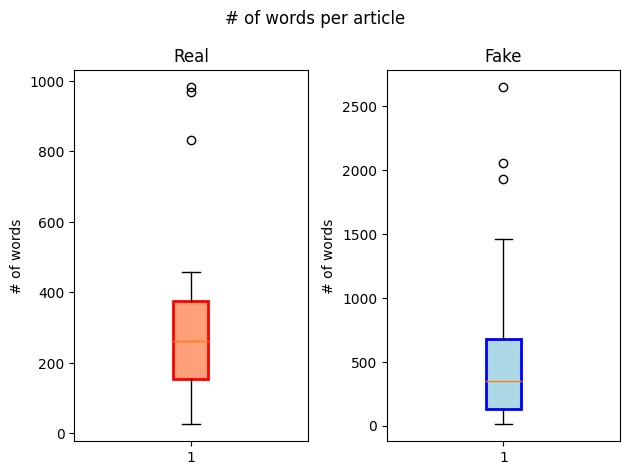

In [285]:
Stat.boxplot_word_frequency_fake_vs_real(binary_label="binary_label")

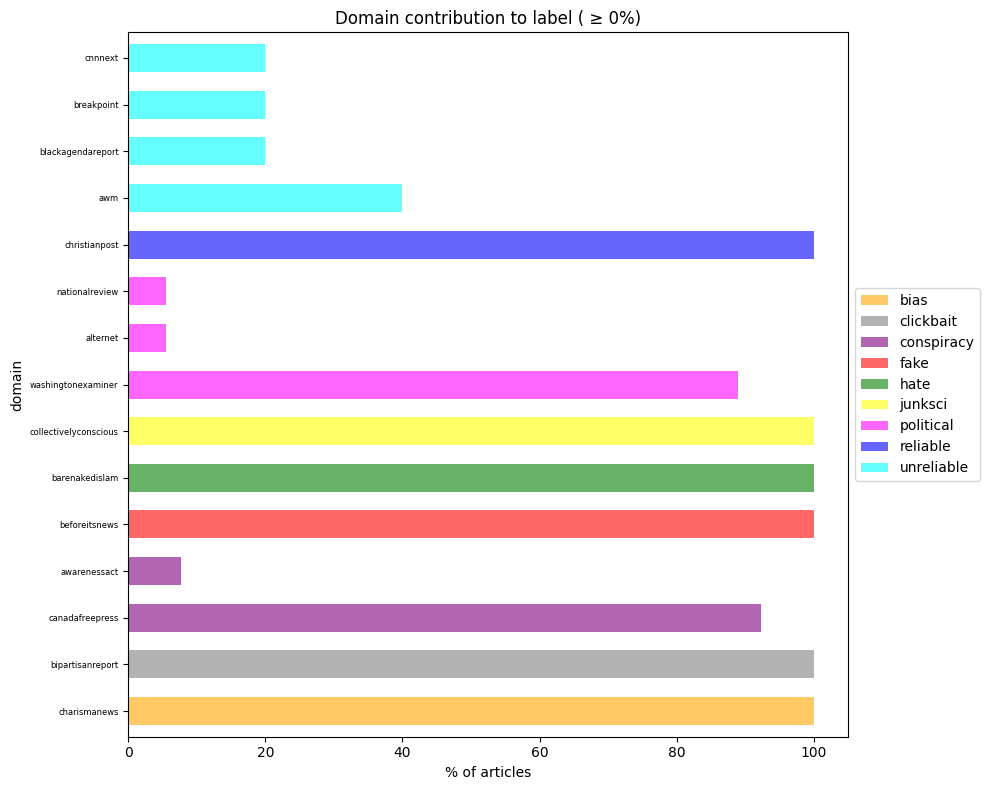

In [286]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

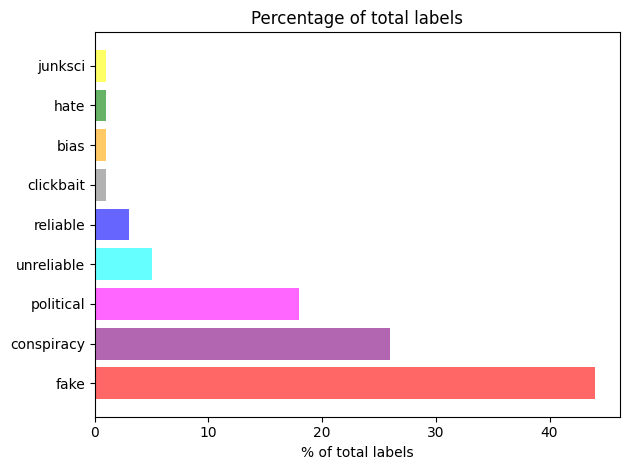

In [287]:
Stat.barplot_type_distribution(percentage = True)

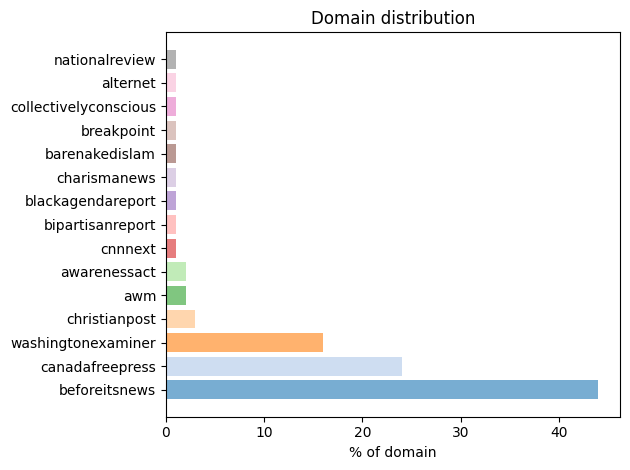

In [288]:
Stat.barplot_domain_distribution(percentage = True)

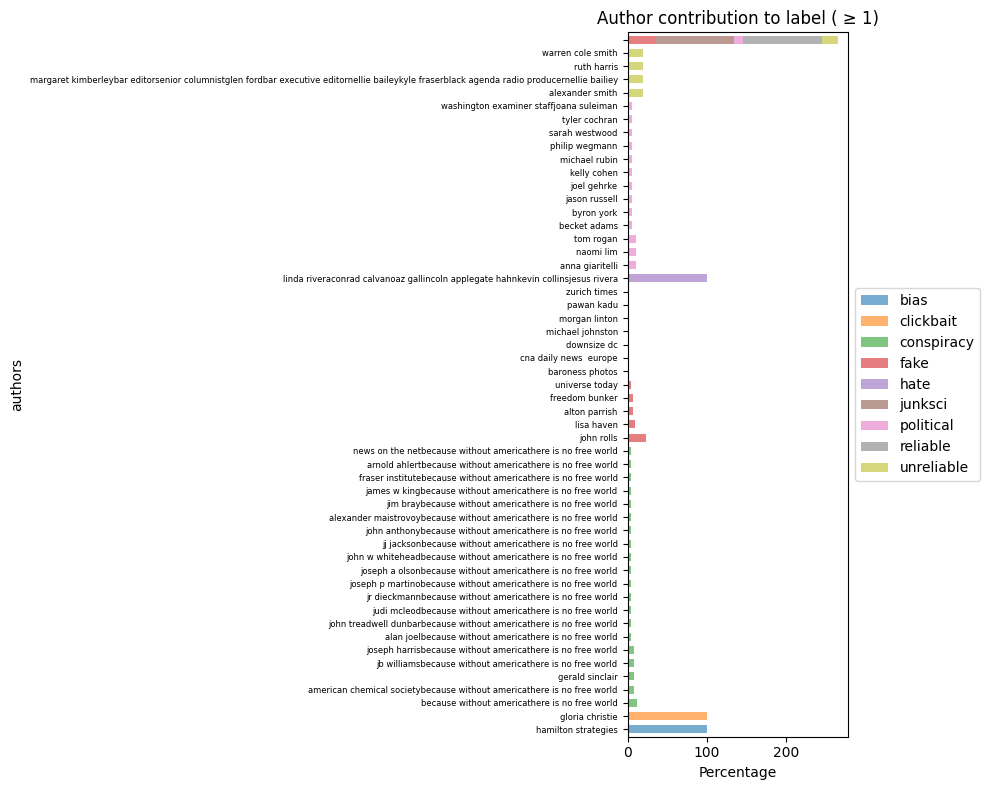

In [289]:
Stat.barplot_authors_contribution(threshold=1)

c:\projects\FakeNews\FakeNews\src\stats_hc.py:171: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.title(f'Percentage of total authors' if percentage else f'Frequency of the authors')


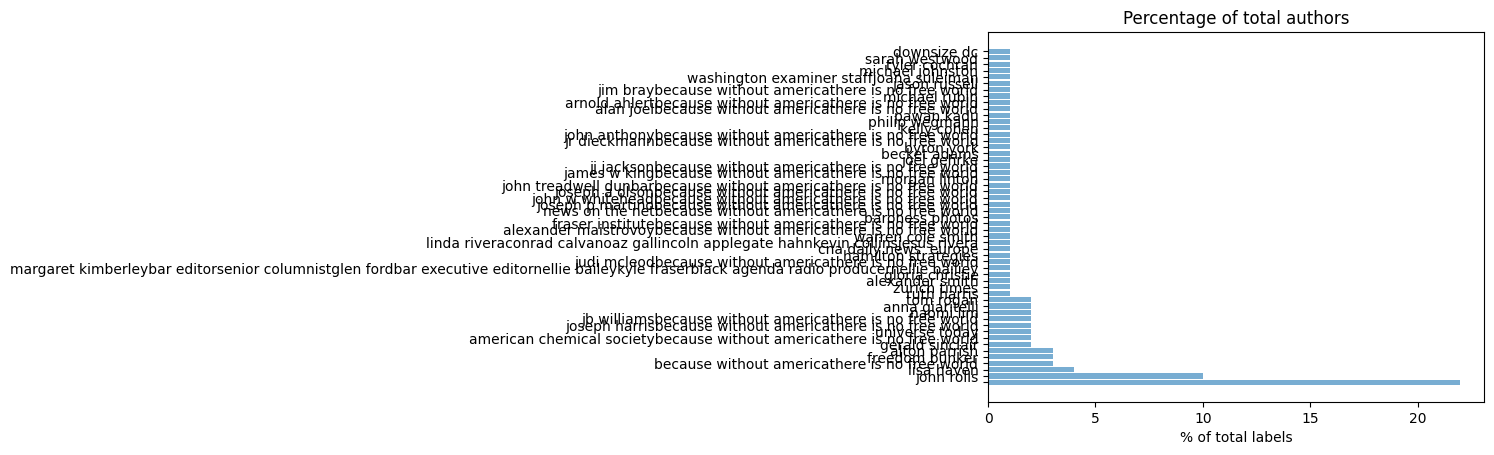

In [290]:
Stat.barplot_authors_distribution(percentage = True)

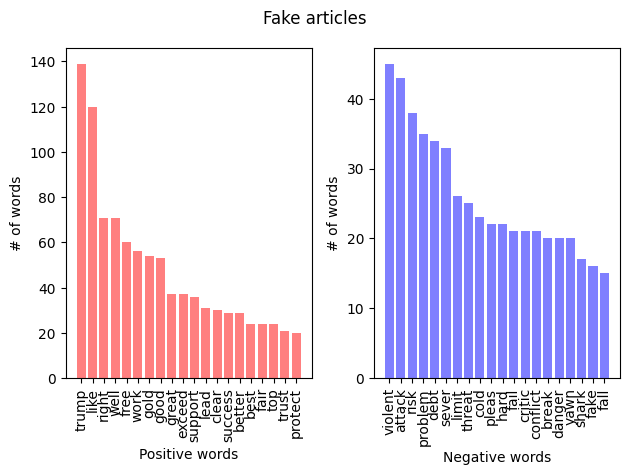

In [291]:
Stat.barplot_pos_vs_neg_in_fake(nwords=20, binary_label="binary_label", percentage=False)

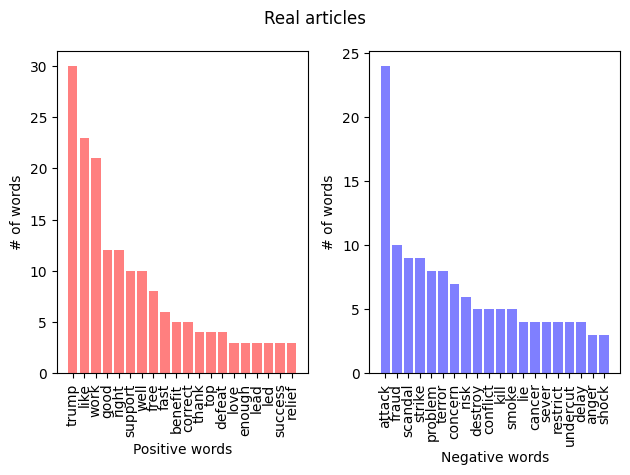

In [292]:
Stat.barplot_pos_vs_neg_in_real(nwords=20, binary_label="binary_label", percentage=False)

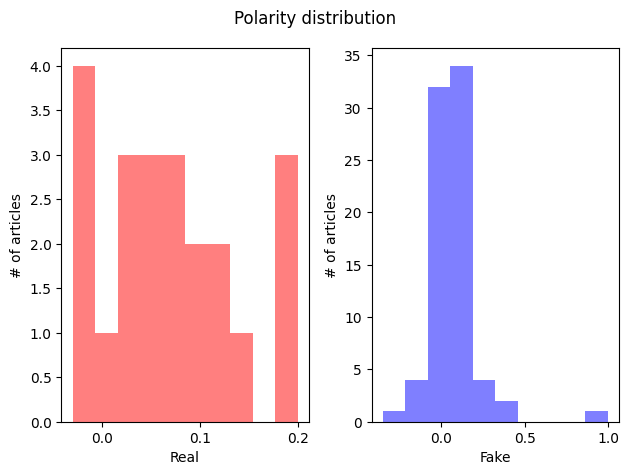

In [ ]:
Stat.barplot_polarity()

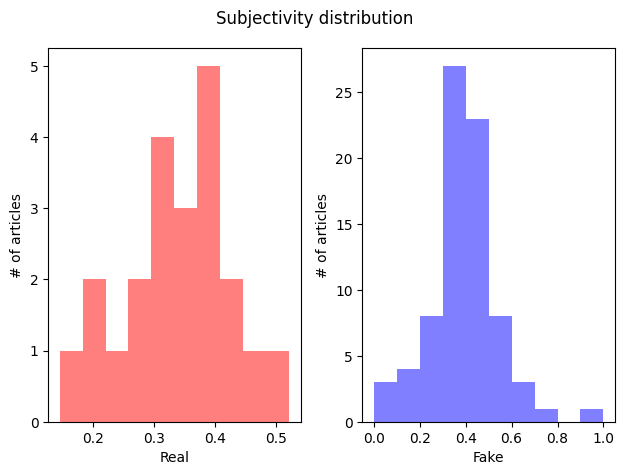

In [ ]:
Stat.barplot_subjectivity()